https://rosettacode.org/wiki/Euler_method

This notebook is about Chapter 8 "Plasticity and Learning" in Dayan and Abbott.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

$v$ is the activity of the post-synaptic neuron, $u$ is the input pattern and $w$ is the synaptic weight.
$$v=w\cdot u$$
$$\tau\frac{dw}{dt}=v\cdot u$$

Let's use deconvolved calcium data from real neurons https://figshare.com/articles/Recording_of_19_000_neurons_across_mouse_visual_cortex_during_sparse_noise_stimuli/9505250 as input patterns to an artificial neuron $v$. We select the 1000 neurons as input patterns. 

In [6]:
dat=np.load('/media/maria/DATA1/Documents/data_for_dayan_notebook/spks.npy')
random_neurons=np.random.randint(0,18795,1000)
print(random_neurons.shape)
input_patterns=dat[random_neurons,:]
del dat

(1000,)


In [7]:
print(input_patterns.shape)

(1000, 30766)


In [17]:
#one timestep with random gaussian weights without plasticity
weights=np.random.normal(loc=0,size=(1000,))
v=np.dot(weights,input_patterns[:,1])
print(v)

204.06541270264358


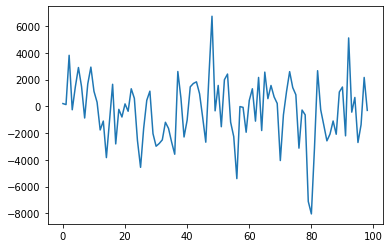

In [21]:
#multiple time steps with random gaussian weights without plasticity
v_lst=[]
for j in range(1,100):
    v_lst.append(np.dot(weights,input_patterns[:,j]))
plt.plot(v_lst)

(1000, 198)


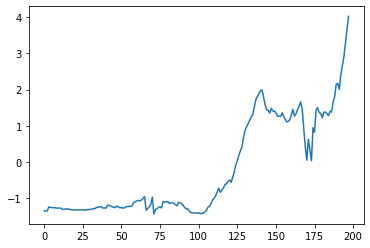

In [56]:
#Using Euler's method to calculate the weight increments
h=0.001
input_patterns=zscore(input_patterns,axis=1)
v_lst=[]
w_lst=[]
w=np.random.normal(loc=0,size=(1000,))
v_lst=[np.dot(w,input_patterns[:,1])]
for j in range(2,200):
    v_lst.append(np.dot(w,input_patterns[:,j]))
    w=w+h*v_lst[-1]*input_patterns[:,j]
    w=np.clip(w,a_min=-100,a_max=100)
    w_lst.append(w)
w_arr=np.array(w_lst).T
print(w_arr.shape)
plt.plot(w_arr[0,:])

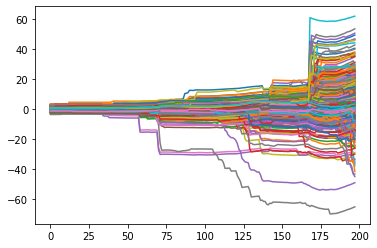

In [59]:
for j in range(0,1000):
    plt.plot(w_arr[j,:])

In [54]:
print(v_lst)

[-64.6444791206985, 14.353707064944716, -13.206071317075677, 71.43851352293392, 116.78221962869017, 124.22871940950981, 49.29225921125593, 133.93725989735555, 198.33120798706165, 203.42594076598715, 127.29053736723777, 188.36287204508747, 241.69273187476537, 274.1524701872394, 169.92634126174408, 203.91436114916542, 175.40894093293372, 181.92973138724093, 395.1458240955386, 282.0265471129775, 164.8207624561084, 59.31152112043671, 47.66632336391943, 2.7606898749820417, -10.979799002237536, 39.46244476465813, 93.5869330621789, 147.76122637228923, 147.59567777513925, 97.28265421059274, 185.25439430915253, 176.75535111289315, 163.32931402406734, 127.05187664744057, 219.49139120850785, 446.6641311301879, 423.00254623926, 159.53616166150013, 424.6889381724918, 501.2367604421035, 442.04331945763056, 91.31544980527083, 341.06868022932605, 185.1226857271688, 85.09450609975602, 213.467091174051, 31.140010671412146, -20.66562858938677, 220.8056453400372, 230.46089432668316, 25.70529754872722, -33

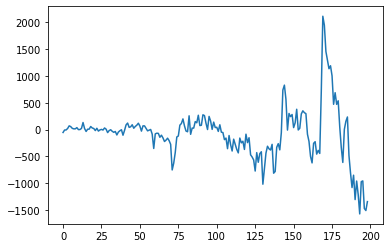

In [58]:
plt.plot(v_lst)